# Mushroom Classification 

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [69]:
data = pd.read_csv("C:/Users/snopy/Favorites/Downloads/mushrooms.csv")
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [73]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
uniqs = []
for x in data.columns:
    uniqs.append(data[x].value_counts())
    uniqs.append('******')
uniqs

[e    4208
 p    3916
 Name: class, dtype: int64,
 '******',
 x    3656
 f    3152
 k     828
 b     452
 s      32
 c       4
 Name: cap-shape, dtype: int64,
 '******',
 y    3244
 s    2556
 f    2320
 g       4
 Name: cap-surface, dtype: int64,
 '******',
 n    2284
 g    1840
 e    1500
 y    1072
 w    1040
 b     168
 p     144
 c      44
 u      16
 r      16
 Name: cap-color, dtype: int64,
 '******',
 f    4748
 t    3376
 Name: bruises, dtype: int64,
 '******',
 n    3528
 f    2160
 y     576
 s     576
 a     400
 l     400
 p     256
 c     192
 m      36
 Name: odor, dtype: int64,
 '******',
 f    7914
 a     210
 Name: gill-attachment, dtype: int64,
 '******',
 c    6812
 w    1312
 Name: gill-spacing, dtype: int64,
 '******',
 b    5612
 n    2512
 Name: gill-size, dtype: int64,
 '******',
 b    1728
 p    1492
 w    1202
 n    1048
 g     752
 h     732
 u     492
 k     408
 e      96
 y      86
 o      64
 r      24
 Name: gill-color, dtype: int64,
 '******',
 t    46

In [4]:
data["class"].replace({"e": "edible", "p": "poisonous"}, inplace=True)
data["cap-shape"].replace({'b':'bell','c':'conical','x':'convex','f':'flat','k':'knobbed','s':'sunken'}, inplace=True)

data["cap-surface"].replace({'g':'grooves','y':'scaly','f':'fibrous','s':'smooth'}, inplace=True)


data["cap-color"].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}, inplace=True)

data["bruises"].replace({'t':'bruises','f':'no'}, inplace=True)


data["odor"].replace({'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'}, inplace=True)

data["gill-attachment"].replace({'a':'attached','f':'free'}, inplace=True)


data["gill-spacing"].replace({'c':'close','w':'crowded'}, inplace=True)

data["gill-size"].replace({'b':'broad','n':'narrow'}, inplace=True)


data["gill-color"].replace({'k':'black','n':'brown','b':'buff','h':'chocolate','g':'gray','r':'green','o':'orange','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'}, inplace=True)

data["stalk-shape"].replace({'e':'enlarging','t':'tapering'}, inplace=True)



data["stalk-root"].replace({'b':'bulbous','c':'club','e':'equal','r':'rooted','?':'missing'}, inplace=True)

data["stalk-surface-above-ring"].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}, inplace=True)

data["stalk-surface-below-ring"].replace({'f':'fibrous','y':'scaly','k':'silky','s':'smooth'}, inplace=True)


data["stalk-color-above-ring"].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow','o':'orange'}, inplace=True)

data["stalk-color-below-ring"].replace({'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow','o':'orange'}, inplace=True)

data["veil-type"].replace({'p':'partial'}, inplace=True)




data["veil-color"].replace({'n':'brown','w':'white','y':'yellow','o':'orange'}, inplace=True)

data["ring-number"].replace({'n':'none','o':'one','t':'two'}, inplace=True)

data["ring-type"].replace({'e':'evanescent','f':'flaring','l':'large','n':'none','p':'pendant'}, inplace=True)



data["spore-print-color"].replace({'n':'brown','b':'buff','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow','o':'orange','h':'chocolate','k':'black'}, inplace=True)

data["population"].replace({'a':'abundant','c':'clustered','n':'numerous','s':'scattered','v':'several','y':'solitary'}, inplace=True)

data["habitat"].replace({'g':'grasses','l':'leaves','m':'meadows','p':'paths','u':'urban','w':'waste','d':'woods'}, inplace=True)

In [5]:
classes = data['class']
data.drop(['class'],axis=1,inplace=True)
data['class'] = classes

In [6]:
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,grasses,edible
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,white,white,partial,white,one,pendant,brown,numerous,meadows,edible
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,white,white,partial,white,one,pendant,black,scattered,urban,poisonous
4,convex,smooth,gray,no,none,free,crowded,broad,black,tapering,...,white,white,partial,white,one,evanescent,brown,abundant,grasses,edible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,knobbed,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8120,convex,smooth,brown,no,none,attached,close,broad,yellow,enlarging,...,orange,orange,partial,brown,one,pendant,buff,several,leaves,edible
8121,flat,smooth,brown,no,none,attached,close,broad,brown,enlarging,...,orange,orange,partial,orange,one,pendant,buff,clustered,leaves,edible
8122,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,tapering,...,white,white,partial,white,one,evanescent,white,several,leaves,poisonous


In [7]:
col = data.columns
col

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [8]:
uniqs=[]
for x in col:
    uniqs.append(data[x].value_counts())

In [9]:
uniqs

[convex     3656
 flat       3152
 knobbed     828
 bell        452
 sunken       32
 conical       4
 Name: cap-shape, dtype: int64,
 scaly      3244
 smooth     2556
 fibrous    2320
 grooves       4
 Name: cap-surface, dtype: int64,
 brown       2284
 gray        1840
 red         1500
 yellow      1072
 white       1040
 buff         168
 pink         144
 cinnamon      44
 purple        16
 green         16
 Name: cap-color, dtype: int64,
 no         4748
 bruises    3376
 Name: bruises, dtype: int64,
 none        3528
 foul        2160
 fishy        576
 spicy        576
 almond       400
 anise        400
 pungent      256
 creosote     192
 musty         36
 Name: odor, dtype: int64,
 free        7914
 attached     210
 Name: gill-attachment, dtype: int64,
 close      6812
 crowded    1312
 Name: gill-spacing, dtype: int64,
 broad     5612
 narrow    2512
 Name: gill-size, dtype: int64,
 buff         1728
 pink         1492
 white        1202
 brown        1048
 gray          7

# Exploring the data

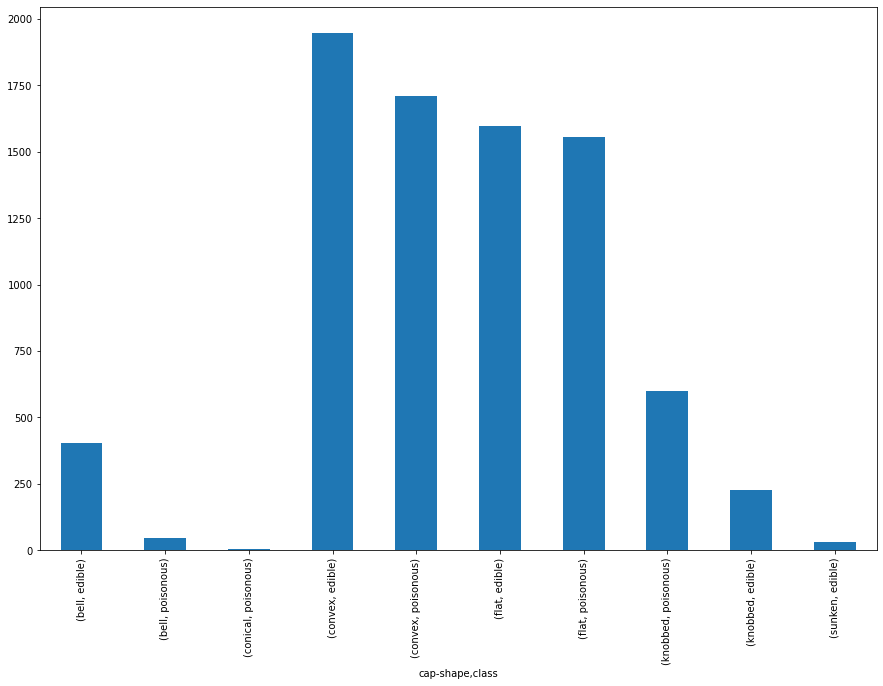

In [10]:
plt.figure(figsize=(15,10))
data.groupby(['cap-shape'])['class'].value_counts().plot(kind='bar')
plt.show()

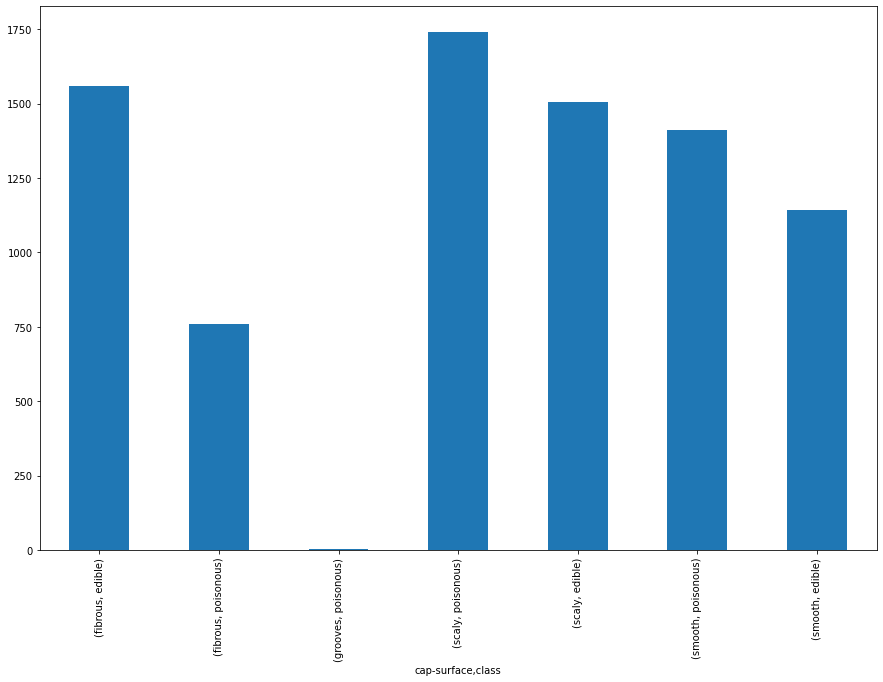

In [11]:
plt.figure(figsize=(15, 10))
data.groupby(['cap-surface'])['class'].value_counts().plot(kind='bar')
plt.show()

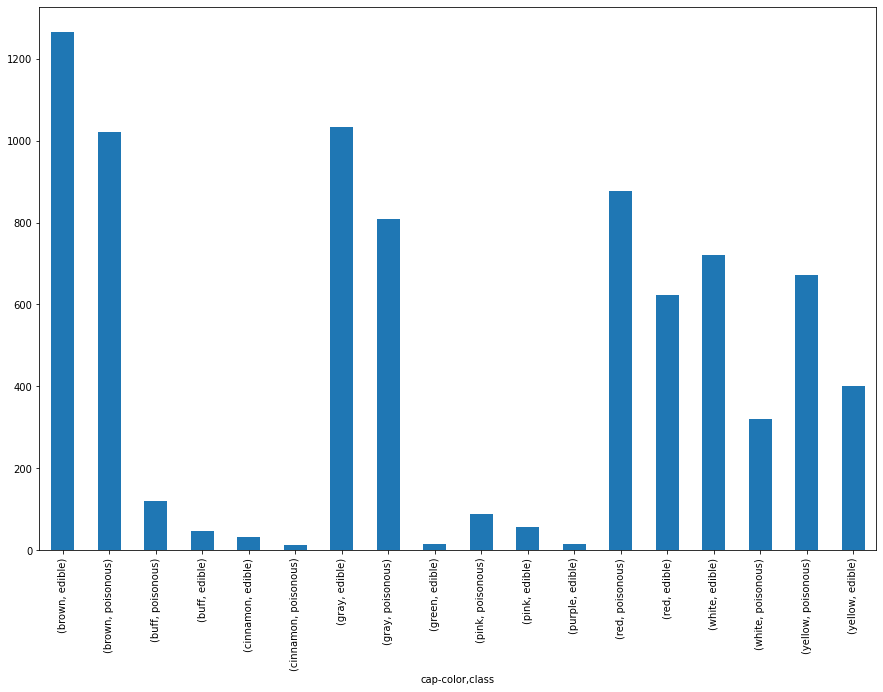

In [12]:
plt.figure(figsize=(15, 10))
data.groupby(['cap-color'])['class'].value_counts().plot(kind='bar')
plt.show()

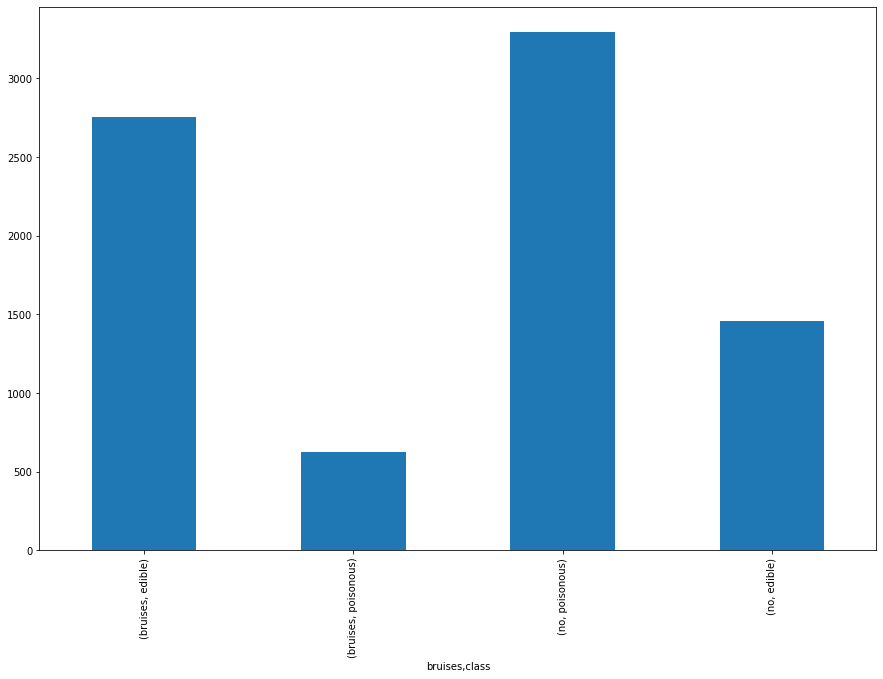

In [13]:
plt.figure(figsize=(15, 10))
data.groupby(['bruises'])['class'].value_counts().plot(kind='bar')
plt.show()

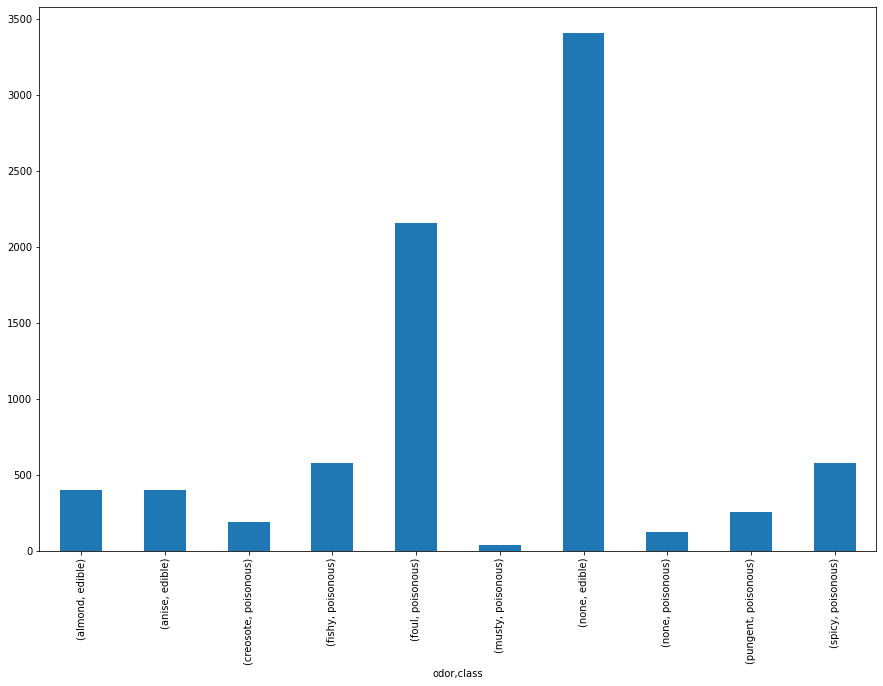

In [14]:
plt.figure(figsize=(15, 10))
data.groupby(['odor'])['class'].value_counts().plot(kind='bar')
plt.show()

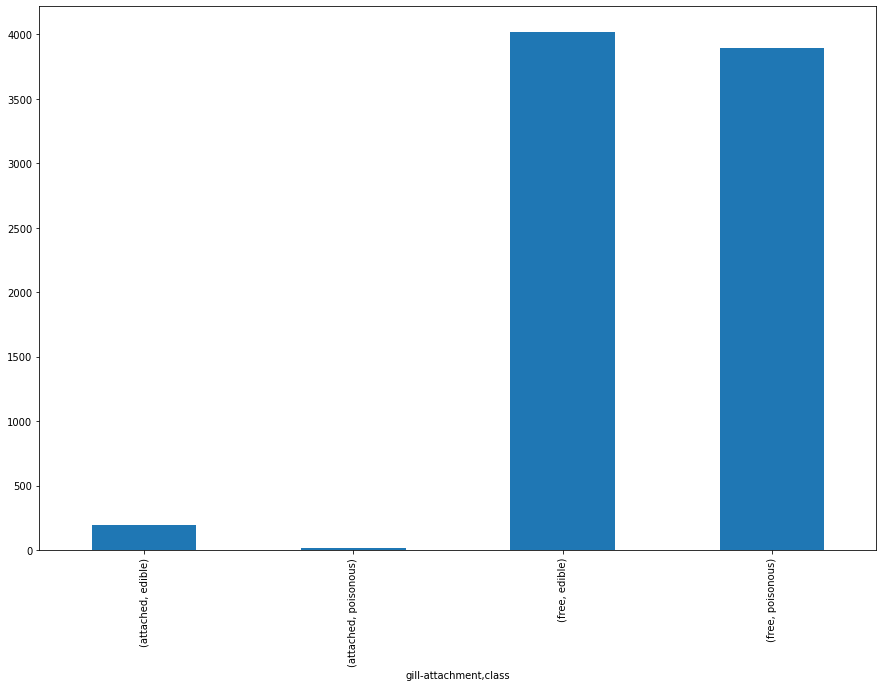

In [16]:
plt.figure(figsize=(15, 10))
data.groupby(['gill-attachment'])['class'].value_counts().plot(kind='bar')
plt.show()

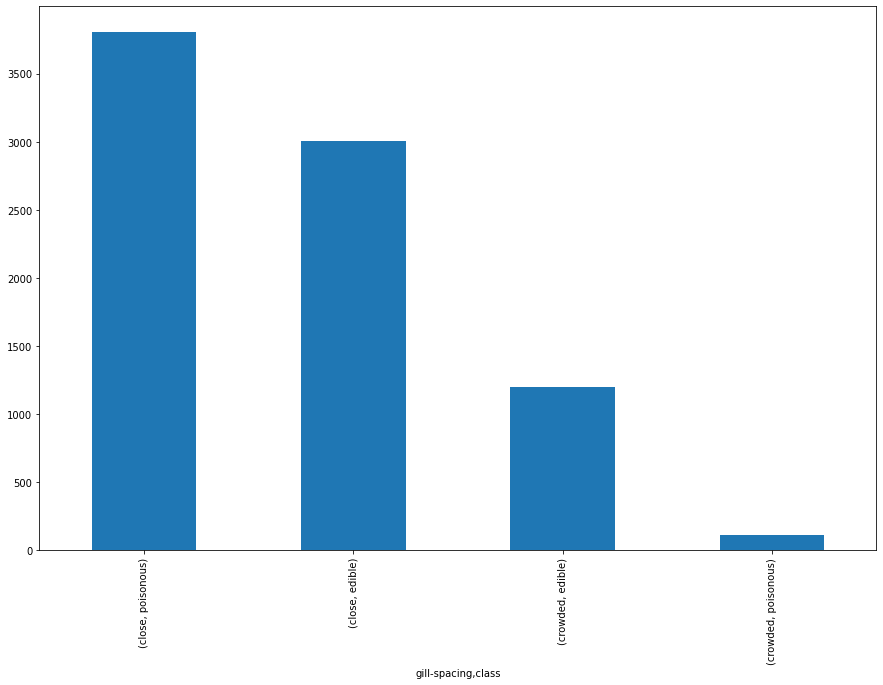

In [17]:
plt.figure(figsize=(15, 10))
data.groupby(['gill-spacing'])['class'].value_counts().plot(kind='bar')
plt.show()

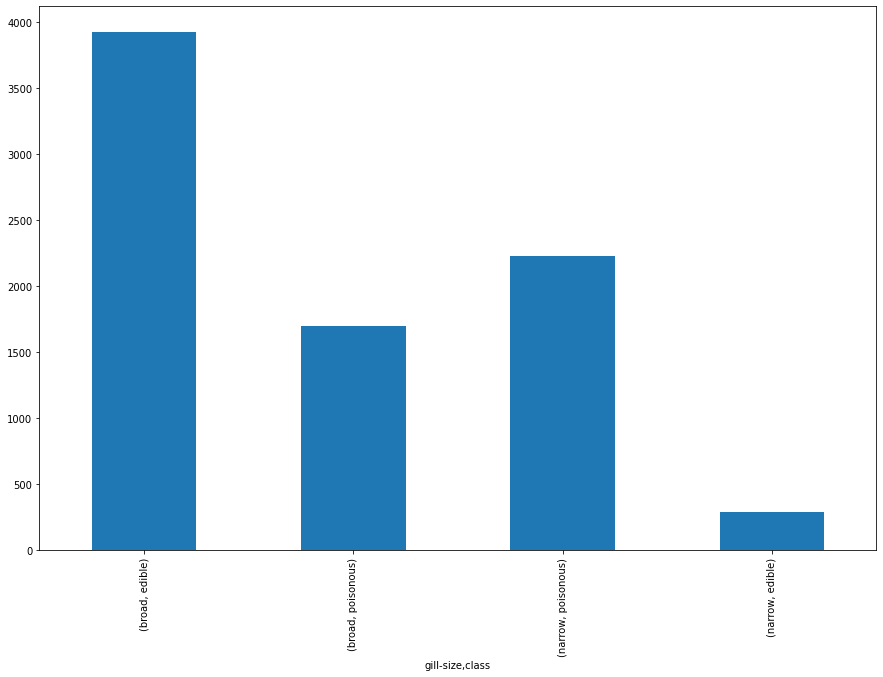

In [18]:
plt.figure(figsize=(15, 10))
data.groupby(['gill-size'])['class'].value_counts().plot(kind='bar')
plt.show()

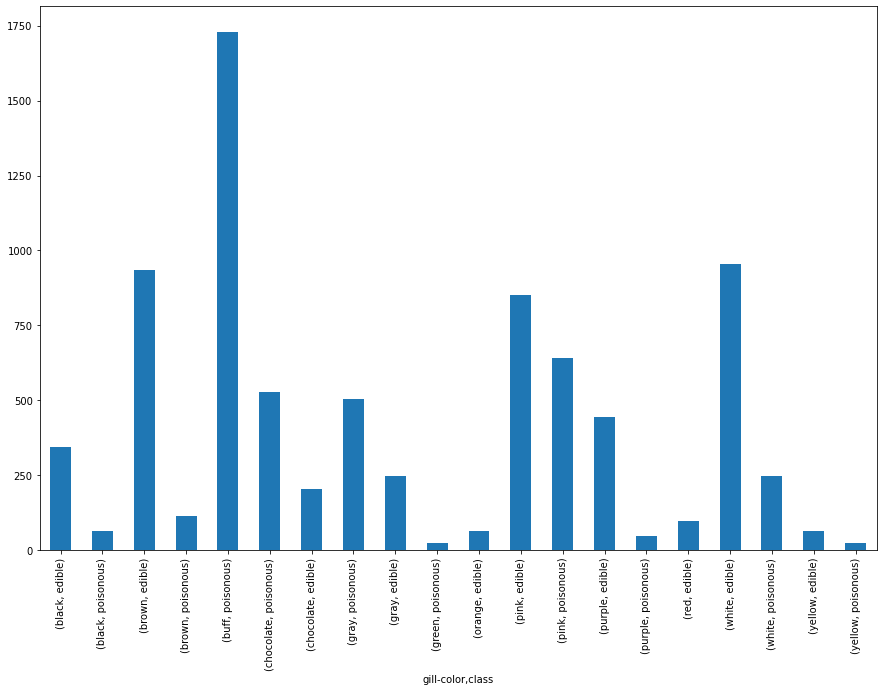

In [19]:
plt.figure(figsize=(15, 10))
data.groupby(['gill-color'])['class'].value_counts().plot(kind='bar')
plt.show()

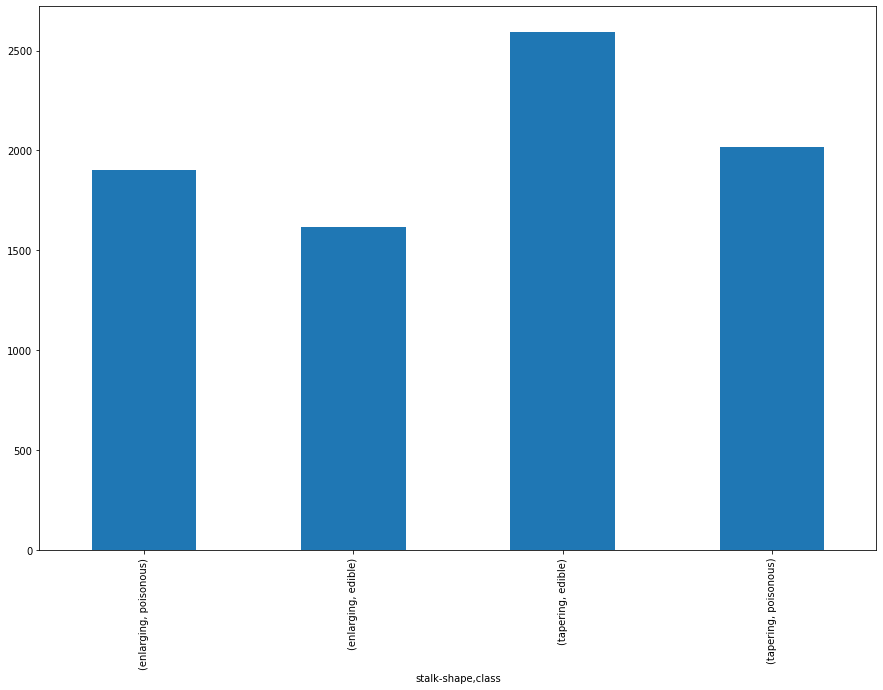

In [20]:
plt.figure(figsize=(15, 10))
data.groupby(['stalk-shape'])['class'].value_counts().plot(kind='bar')
plt.show()

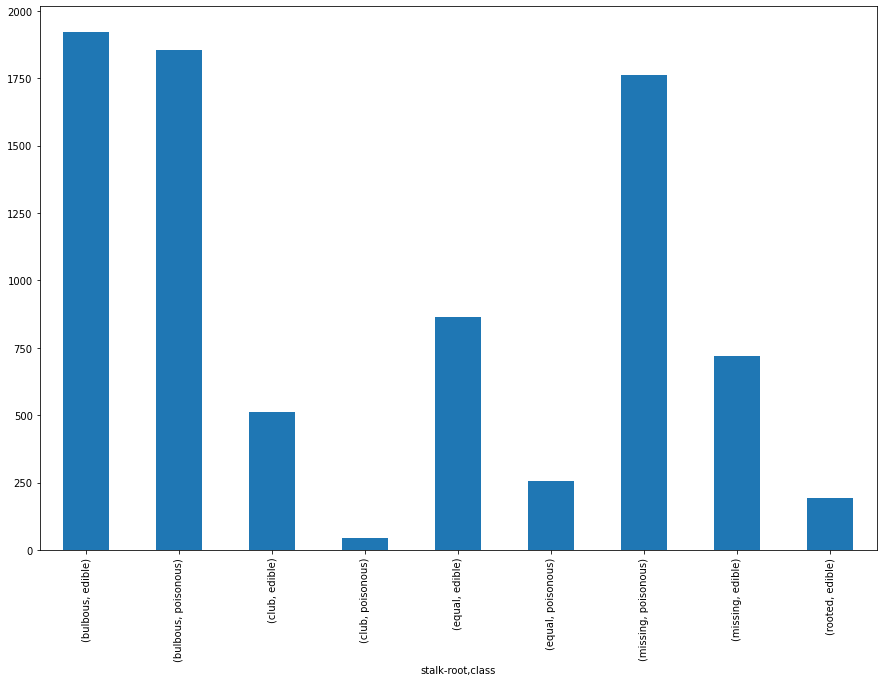

In [21]:
plt.figure(figsize=(15, 10))
data.groupby(['stalk-root'])['class'].value_counts().plot(kind='bar')
plt.show()


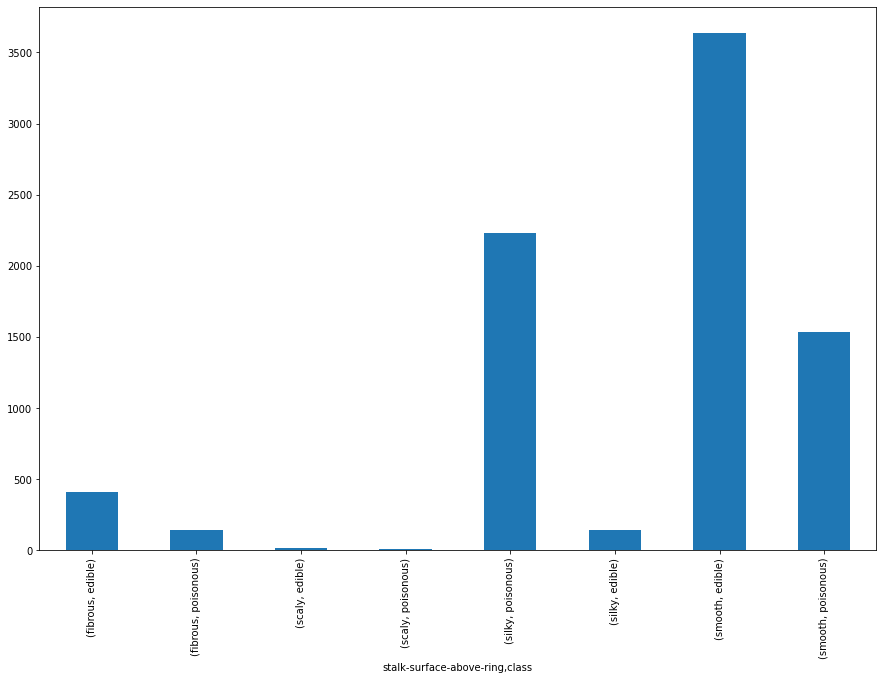

In [22]:
plt.figure(figsize=(15, 10))
data.groupby(['stalk-surface-above-ring'])['class'].value_counts().plot(kind='bar')
plt.show()


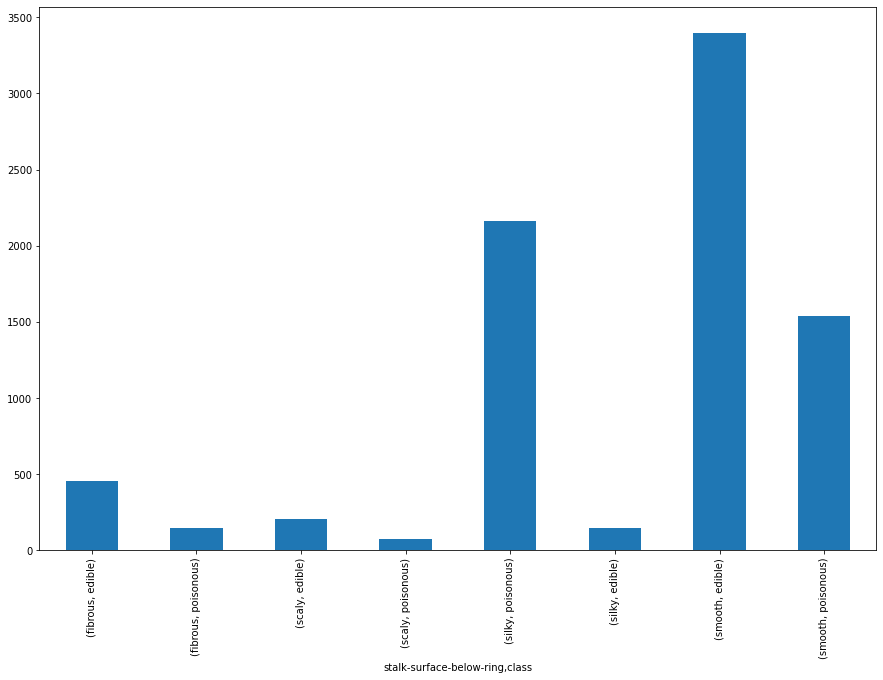

In [23]:
plt.figure(figsize=(15, 10))
data.groupby(['stalk-surface-below-ring'])['class'].value_counts().plot(kind='bar')
plt.show()

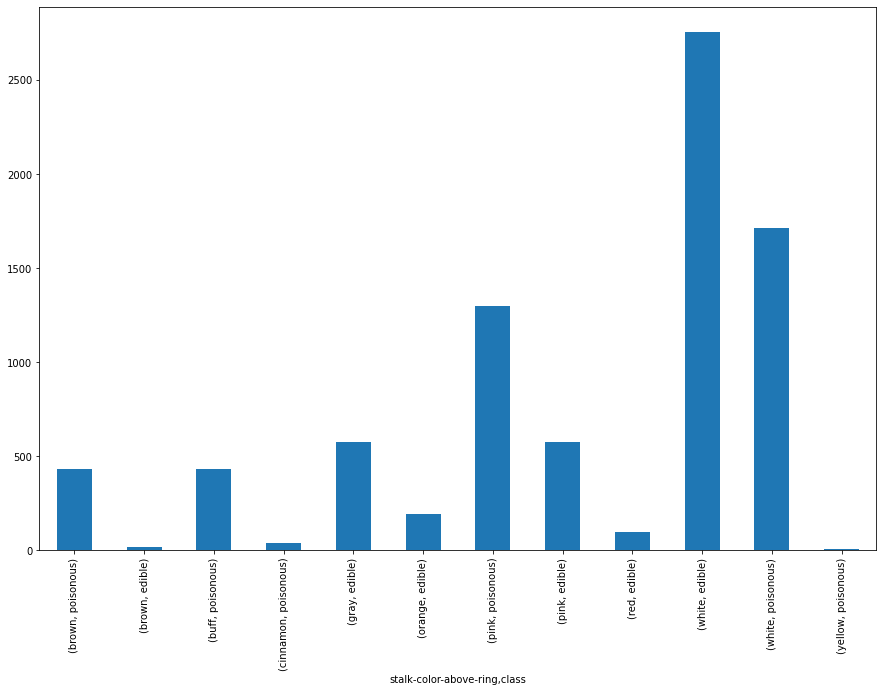

In [24]:
plt.figure(figsize=(15, 10))
data.groupby(['stalk-color-above-ring'])['class'].value_counts().plot(kind='bar')
plt.show()

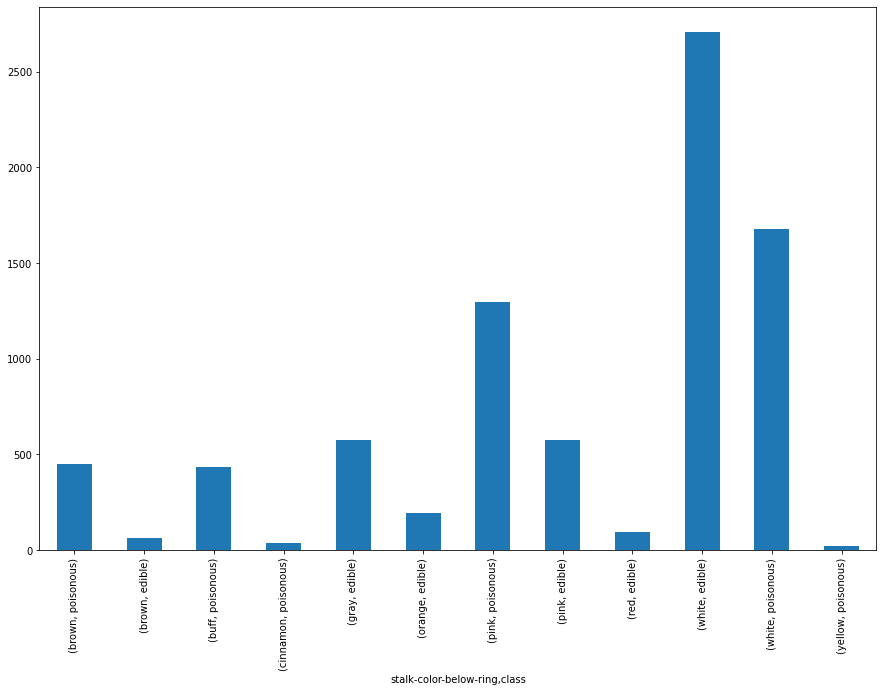

In [25]:
plt.figure(figsize=(15, 10))
data.groupby(['stalk-color-below-ring'])['class'].value_counts().plot(kind='bar')
plt.show()

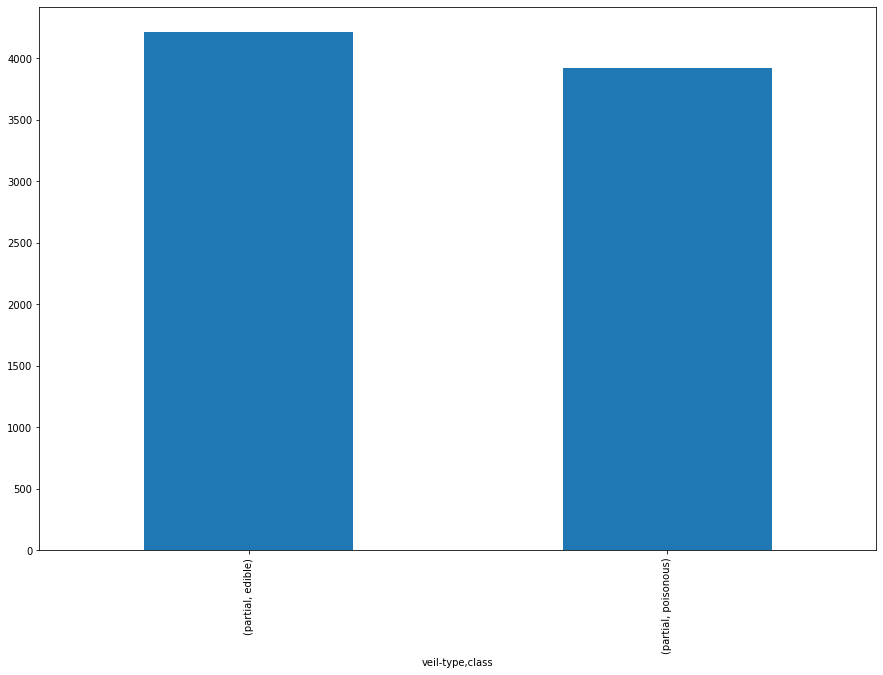

In [26]:
plt.figure(figsize=(15, 10))
data.groupby(['veil-type'])['class'].value_counts().plot(kind='bar')
plt.show()

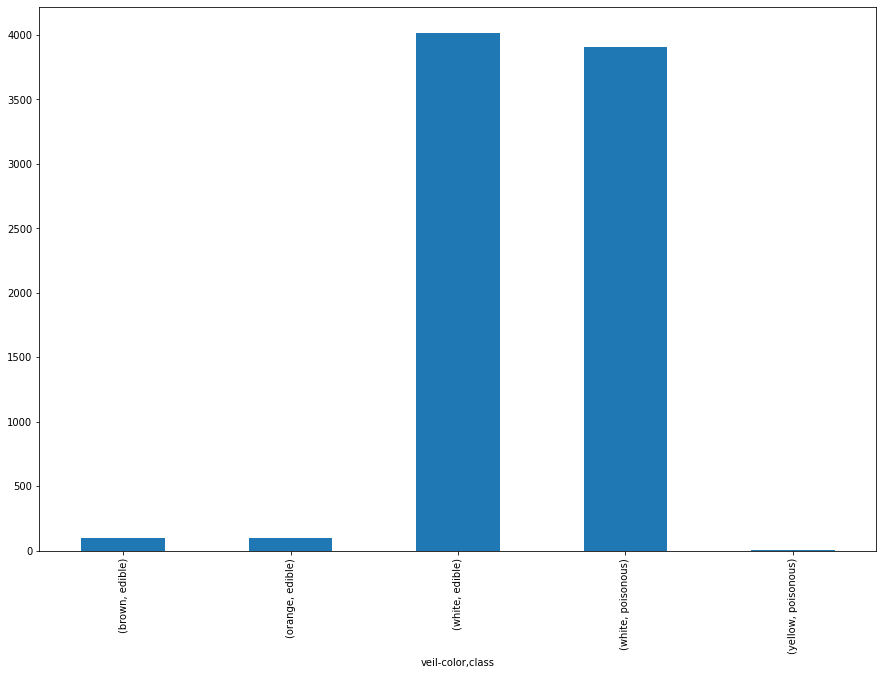

In [27]:
plt.figure(figsize=(15, 10))
data.groupby(['veil-color'])['class'].value_counts().plot(kind='bar')
plt.show()

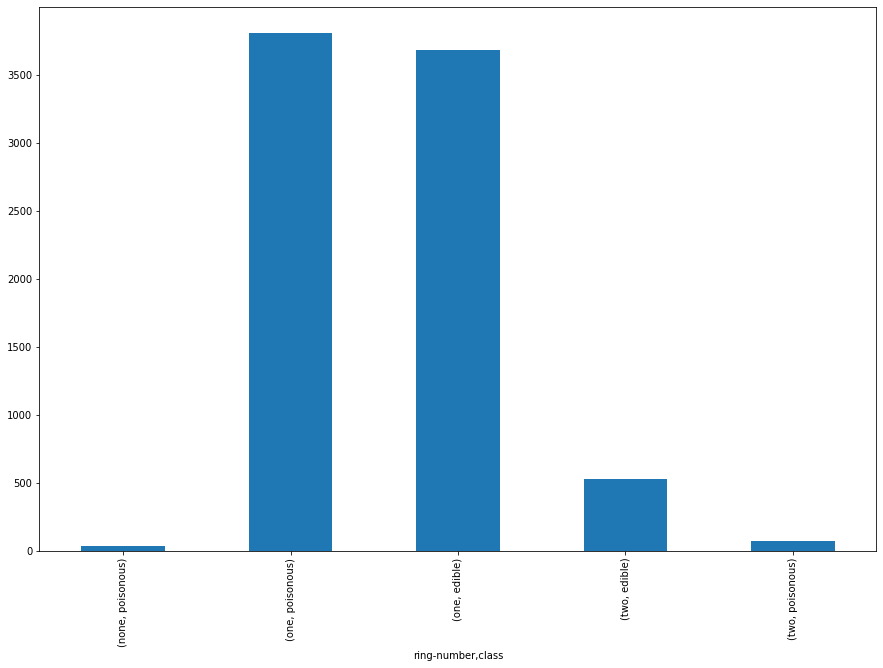

In [28]:
plt.figure(figsize=(15, 10))
data.groupby(['ring-number'])['class'].value_counts().plot(kind='bar')
plt.show()

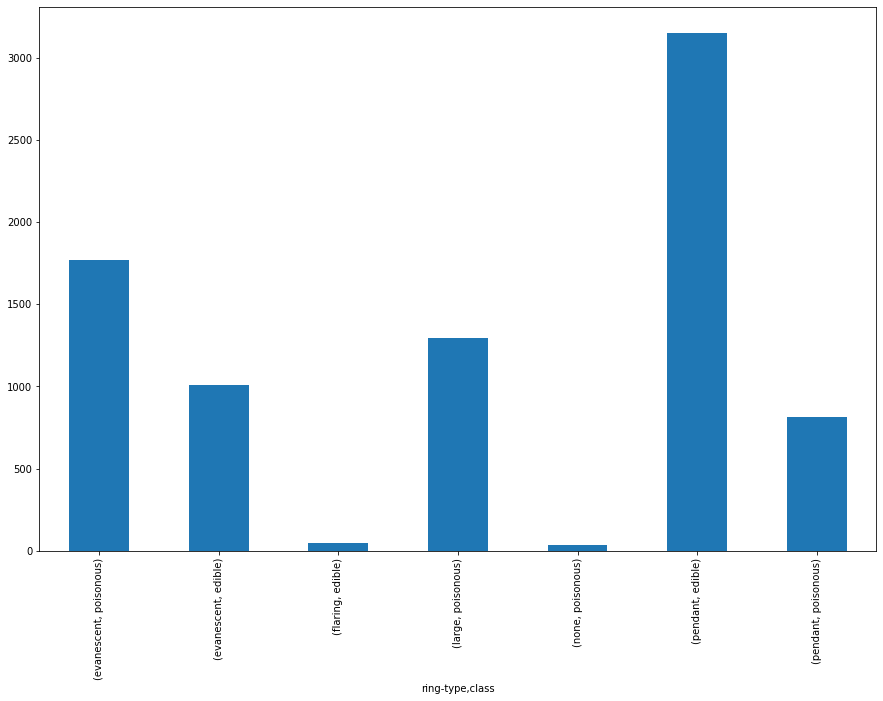

In [29]:
plt.figure(figsize=(15, 10))
data.groupby(['ring-type'])['class'].value_counts().plot(kind='bar')
plt.show()

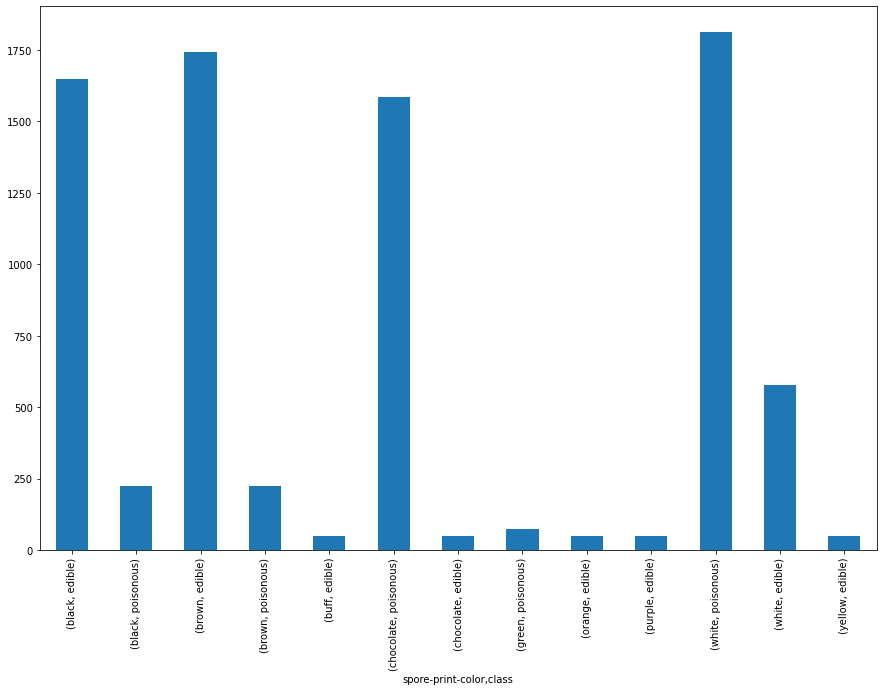

In [30]:
plt.figure(figsize=(15, 10))
data.groupby(['spore-print-color'])['class'].value_counts().plot(kind='bar')
plt.show()

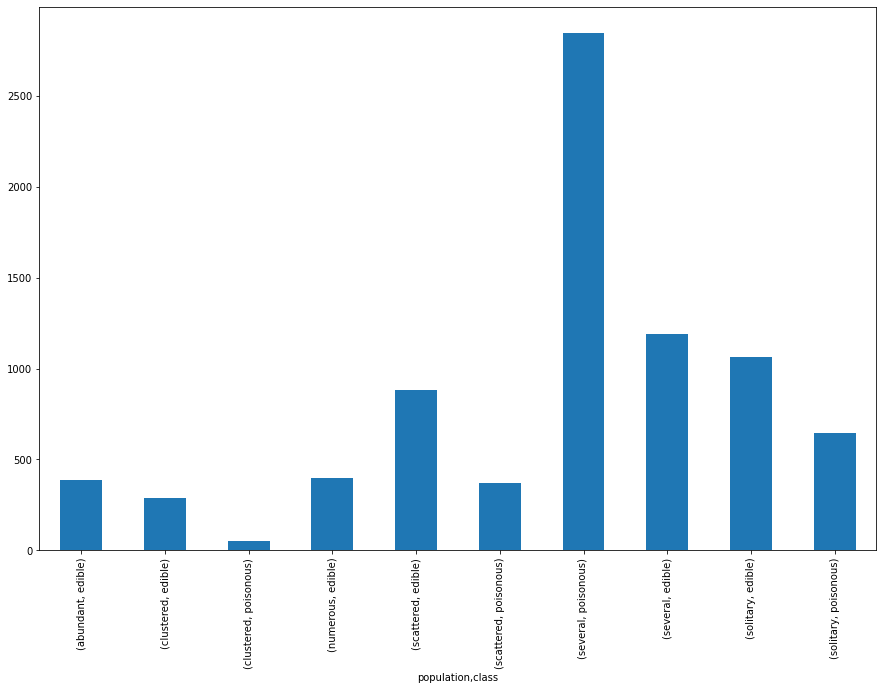

In [31]:
plt.figure(figsize=(15, 10))
data.groupby(['population'])['class'].value_counts().plot(kind='bar')
plt.show()

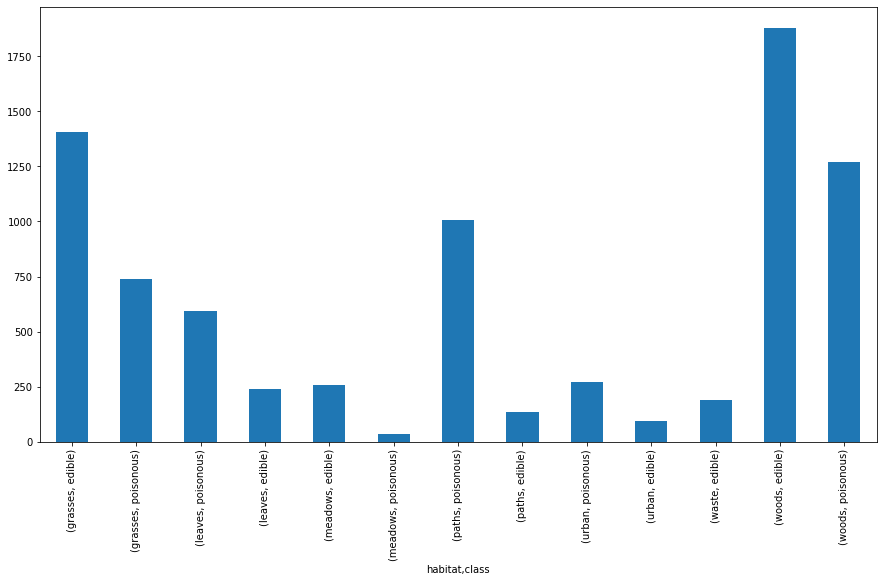

In [32]:
plt.figure(figsize=(15, 8))
data.groupby(['habitat'])['class'].value_counts().plot(kind='bar')
plt.show()

In [33]:
data['cap-shape'].value_counts()

convex     3656
flat       3152
knobbed     828
bell        452
sunken       32
conical       4
Name: cap-shape, dtype: int64

# Building the model

In [34]:
y = data['class']
x = data.drop(['class'],axis=1)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [36]:
Encoder_x = LabelEncoder()
for col in x.columns:
    x[col]=Encoder_x.fit_transform(x[col])
Encoder_y = LabelEncoder()

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=1)

In [45]:
x_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
6992,4,2,7,1,3,1,0,1,2,1,...,3,7,5,0,2,1,0,7,4,1
616,3,0,3,1,6,1,1,0,7,1,...,3,7,7,0,2,1,0,0,0,0
2623,3,0,0,0,6,1,0,0,8,1,...,3,5,3,0,2,1,4,0,5,6
2772,2,2,7,0,6,1,0,0,1,1,...,3,3,5,0,2,1,4,1,4,6
976,0,2,8,0,1,1,0,0,1,0,...,3,7,7,0,2,1,4,0,2,0


In [46]:
#using knn algorithm
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_predict = knn.predict(x_test)
accuracy_score(knn_predict,y_test)

C:\Users\snopy\anaconda\envs\mushroom_classification2\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.9992540096978739

In [40]:
#using decision tree
dst = DecisionTreeClassifier()
dst.fit(x_train,y_train)
dst_predict = dst.predict(x_test)
accuracy_score(dst_predict,y_test)

1.0

In [41]:
#using random forest
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
RF_predict = RF.predict(x_test)
accuracy_score(RF_predict,y_test)

1.0

In [42]:
#using gaussian naive bias
NB = GaussianNB()
NB.fit(x_train,y_train)
NB_predict = NB.predict(x_test)
accuracy_score(NB_predict,y_test)

0.8769116001491981

# OneHotEncoder

In [47]:
Y = data['class']
X1 = data.drop(['class'],axis=1)

In [48]:
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder()
X = encode.fit_transform(X1)

In [49]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.33,random_state=1)

In [50]:
X_train

<5443x117 sparse matrix of type '<class 'numpy.float64'>'
	with 119746 stored elements in Compressed Sparse Row format>

In [51]:
#using knn 
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
knn_predict = knn.predict(X_test)
accuracy_score(knn_predict,Y_test)

1.0

In [52]:
#using decision tree
dst = DecisionTreeClassifier()
dst.fit(X_train,Y_train)
dst_predict = dst.predict(X_test)
accuracy_score(dst_predict,Y_test)

1.0

In [53]:
#using random forest
RRF=RandomForestClassifier()
RRF.fit(X_train,Y_train)
RRF_predict=RRF.predict(X_test)
accuracy_score(RRF_predict,Y_test)

1.0

In [54]:
import pickle

In [55]:
random_forest_model = RRF

In [56]:
encodes = encode

In [57]:
model_name = "model1.pkl"
encode_name = 'encode1.pkl'

model = open(model_name,'wb')
pickle.dump(random_forest_model,model)
encode = open(encode_name,'wb')
pickle.dump(encodes,encode)

model.close()
encode.close()

In [58]:
model = open('model1.pkl','rb')
model = pickle.load(model)

In [59]:
encode = open('encode1.pkl','rb')
encode = pickle.load(encode)

In [60]:
X=data.drop(['class'],axis=1)

In [61]:
X_encode = encode.transform(X)

In [62]:
predict = model.predict(X_encode)

In [63]:
predict

array(['poisonous', 'edible', 'edible', ..., 'edible', 'poisonous',
       'edible'], dtype=object)

In [64]:
predict[122]

'poisonous'

In [65]:
data.iloc[122]

cap-shape                        flat
cap-surface                     scaly
cap-color                       brown
bruises                       bruises
odor                          pungent
gill-attachment                  free
gill-spacing                    close
gill-size                      narrow
gill-color                       pink
stalk-shape                 enlarging
stalk-root                      equal
stalk-surface-above-ring       smooth
stalk-surface-below-ring       smooth
stalk-color-above-ring          white
stalk-color-below-ring          white
veil-type                     partial
veil-color                      white
ring-number                       one
ring-type                     pendant
spore-print-color               black
population                    several
habitat                       grasses
class                       poisonous
Name: 122, dtype: object

In [66]:
data.iloc[4].to_list()

['convex',
 'smooth',
 'gray',
 'no',
 'none',
 'free',
 'crowded',
 'broad',
 'black',
 'tapering',
 'equal',
 'smooth',
 'smooth',
 'white',
 'white',
 'partial',
 'white',
 'one',
 'evanescent',
 'brown',
 'abundant',
 'grasses',
 'edible']